# Pushkal Ojha
# Batch B2
# 220968422

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns

## Dataset 1

In [4]:
df = pd.read_csv("pulsar_data.csv")

In [5]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357282,0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0


## Explore the data to gain insights about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 881.0 KB


In [7]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [8]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [9]:
df['target_class'].value_counts()

0    11375
1     1153
Name: target_class, dtype: int64

<AxesSubplot:>

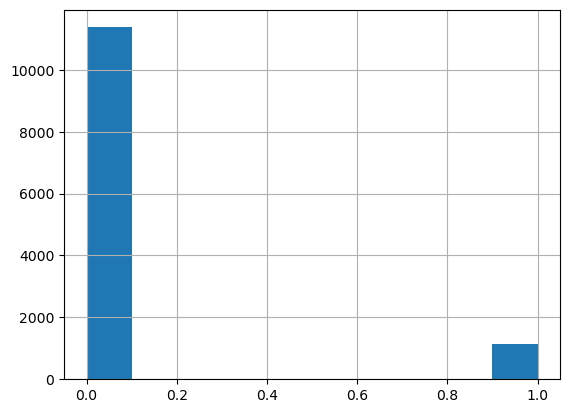

In [10]:
df['target_class'].hist()

In [11]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


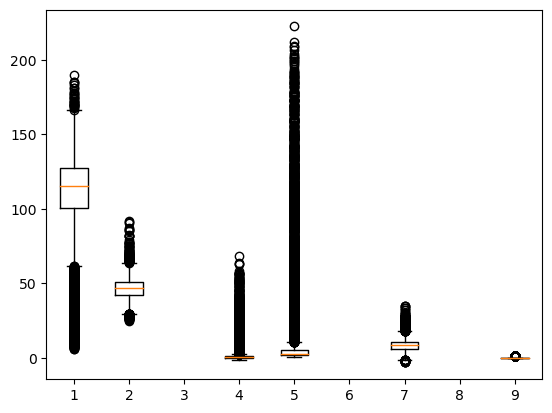

In [12]:
plt.boxplot(df)
plt.show()

In [13]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357282,0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0


In [14]:
sc = StandardScaler()

In [15]:
model = sc.fit(df.drop(columns = ['target_class']))

In [16]:
scaled_data = model.transform(df.drop(columns = ['target_class']))

In [17]:
sc_df = pd.DataFrame(scaled_data)

In [18]:
sc_df

,0,1,2,3,4,5,6,7
0,0.393989,0.272252,-0.096804,-0.288585,-0.321013,-0.405505,-0.194818,-0.375869
1,-1.327257,-1.521273,0.220118,0.259381,-0.346990,-0.447748,0.238373,-0.026098
2,0.761306,0.986368,-0.324179,-0.334344,-0.335385,-0.203405,0.038556,-0.293258
3,1.766787,0.344739,-0.652356,-0.314056,0.161989,NaN,-1.185162,-0.915572
4,-1.022022,-1.529786,0.325424,0.240922,-0.333804,-0.292367,0.015768,-0.272216
...,...,...,...,...,...,...,...,...
12523,0.516935,0.978945,-0.461148,-0.376027,-0.185340,0.150788,-0.838280,-0.780302
12524,0.178225,0.038696,-0.244558,-0.249939,-0.220663,NaN,-0.573526,-0.662679
12525,0.194354,-0.486353,0.173678,-0.216704,-0.401514,-0.750800,1.922948,1.924470
12526,0.959115,0.501751,-0.533963,-0.322985,-0.297691,-0.247314,-0.206168,-0.402176


In [19]:
sc_df = pd.concat([sc_df, df['target_class']], axis = 1)

In [20]:
sc_df

,0,1,2,3,4,5,6,7,target_class
0,0.393989,0.272252,-0.096804,-0.288585,-0.321013,-0.405505,-0.194818,-0.375869,0
1,-1.327257,-1.521273,0.220118,0.259381,-0.346990,-0.447748,0.238373,-0.026098,0
2,0.761306,0.986368,-0.324179,-0.334344,-0.335385,-0.203405,0.038556,-0.293258,0
3,1.766787,0.344739,-0.652356,-0.314056,0.161989,NaN,-1.185162,-0.915572,0
4,-1.022022,-1.529786,0.325424,0.240922,-0.333804,-0.292367,0.015768,-0.272216,0
...,...,...,...,...,...,...,...,...,...
12523,0.516935,0.978945,-0.461148,-0.376027,-0.185340,0.150788,-0.838280,-0.780302,0
12524,0.178225,0.038696,-0.244558,-0.249939,-0.220663,NaN,-0.573526,-0.662679,0
12525,0.194354,-0.486353,0.173678,-0.216704,-0.401514,-0.750800,1.922948,1.924470,0
12526,0.959115,0.501751,-0.533963,-0.322985,-0.297691,-0.247314,-0.206168,-0.402176,0


In [21]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [22]:
sc_df = sc_df.rename(columns = {0:' Mean of the integrated profile',
       1:' Standard deviation of the integrated profile',
       2:' Excess kurtosis of the integrated profile',
       3:' Skewness of the integrated profile',4:' Mean of the DM-SNR curve',
       5:' Standard deviation of the DM-SNR curve',
       6:' Excess kurtosis of the DM-SNR curve', 7:' Skewness of the DM-SNR curve'})

In [23]:
sc_df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.393989,0.272252,-0.096804,-0.288585,-0.321013,-0.405505,-0.194818,-0.375869,0
1,-1.327257,-1.521273,0.220118,0.259381,-0.346990,-0.447748,0.238373,-0.026098,0
2,0.761306,0.986368,-0.324179,-0.334344,-0.335385,-0.203405,0.038556,-0.293258,0
3,1.766787,0.344739,-0.652356,-0.314056,0.161989,NaN,-1.185162,-0.915572,0
4,-1.022022,-1.529786,0.325424,0.240922,-0.333804,-0.292367,0.015768,-0.272216,0
...,...,...,...,...,...,...,...,...,...
12523,0.516935,0.978945,-0.461148,-0.376027,-0.185340,0.150788,-0.838280,-0.780302,0
12524,0.178225,0.038696,-0.244558,-0.249939,-0.220663,NaN,-0.573526,-0.662679,0
12525,0.194354,-0.486353,0.173678,-0.216704,-0.401514,-0.750800,1.922948,1.924470,0
12526,0.959115,0.501751,-0.533963,-0.322985,-0.297691,-0.247314,-0.206168,-0.402176,0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
sc_df_mean = sc_df.fillna(sc_df.mean())

In [26]:
sc_df_mean.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [27]:
X = sc_df_mean.drop(columns = ['target_class'])
y = sc_df_mean['target_class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
from sklearn.svm import SVC

### Running SVM with default hyper parameters

In [30]:
svc = SVC()

In [31]:
svc.fit(X_train, y_train)

SVC()

In [32]:
y_pred = svc.predict(X_test)

In [33]:
print(f"The accuracy score of the model is :{accuracy_score(y_test, y_pred)}")

The accuracy score of the model is :0.9796488427773344


### Running with rbf kernel c = 1.0 and gamma = auto

In [34]:
svc = SVC(C = 1.0, gamma = 'auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of the SVM with kernel = 1.0 and gamma = auto is:{accuracy_score(y_test, y_pred)}")

The accuracy score of the SVM with kernel = 1.0 and gamma = auto is:0.9796488427773344


Training set score: 0.9782478547196168
Test set score: 0.9796488427773344

True Positives(TP) =  2272

True Negatives(TN) =  183

False Positives(FP) =  7

False Negatives(FN) =  44


<AxesSubplot:>

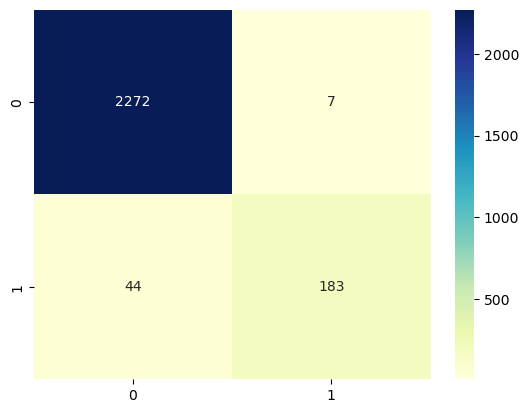

In [35]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [36]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred)
print(f'classification report: {cr}')
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print(f'classification accuracy: {classification_accuracy}')
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(f'classification error: {classification_error}')

classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2279
           1       0.96      0.81      0.88       227

    accuracy                           0.98      2506
   macro avg       0.97      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506

classification accuracy: 0.9796488427773344
classification error: 0.020351157222665603


Text(0, 0.5, 'True Positive Rate')

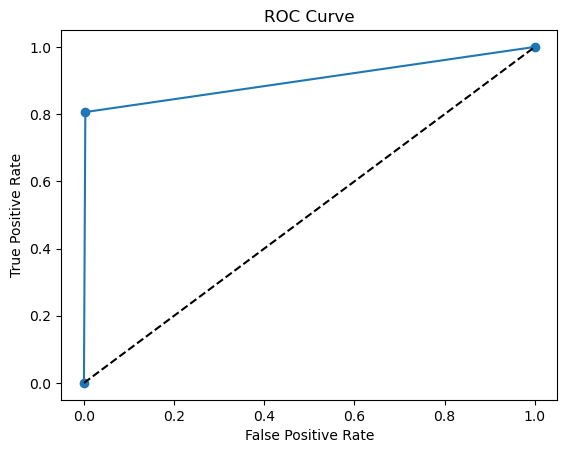

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9015479391417134

### Running SVM with rbf kernel and C = 100.0

In [39]:
svc = SVC(C = 100.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with rbf kernel and c = 100.0 is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with rbf kernel and c = 100.0 is: 0.9780526735833999


Training set score: 0.9839353422470565
Test set score: 0.9780526735833999

True Positives(TP) =  2266

True Negatives(TN) =  185

False Positives(FP) =  13

False Negatives(FN) =  42


<AxesSubplot:>

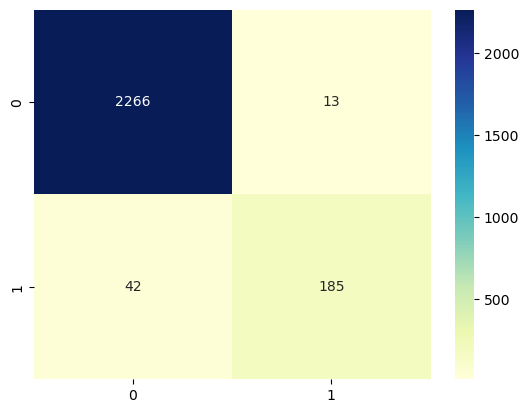

In [40]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [41]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred)
print(f'classification report: {cr}')
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print(f'classification accuracy: {classification_accuracy}')
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(f'classification error: {classification_error}')

classification report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2279
           1       0.93      0.81      0.87       227

    accuracy                           0.98      2506
   macro avg       0.96      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506

classification accuracy: 0.9780526735833999
classification error: 0.02194732641660016


Text(0, 0.5, 'True Positive Rate')

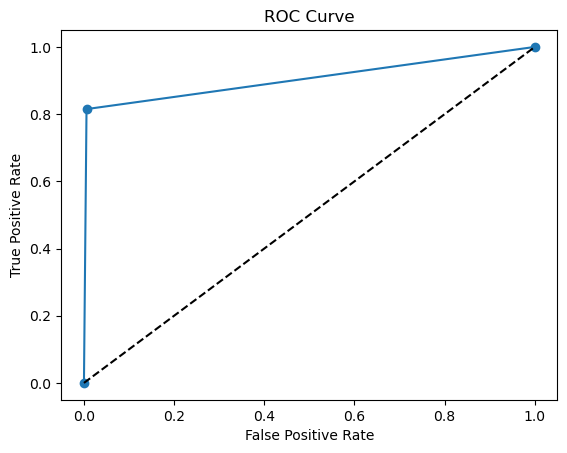

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with rbf kernel and C = 1000.0

In [43]:
svc = SVC(C = 1000.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with rbf kernel and c = 100.0 is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with rbf kernel and c = 100.0 is: 0.9768555466879489


Training set score: 0.9870285372181201
Test set score: 0.9768555466879489

True Positives(TP) =  2260

True Negatives(TN) =  188

False Positives(FP) =  19

False Negatives(FN) =  39


<AxesSubplot:>

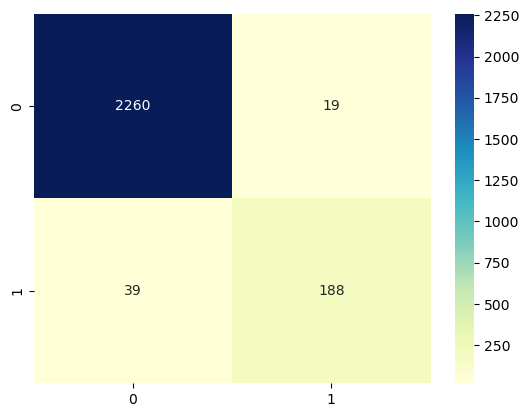

In [44]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

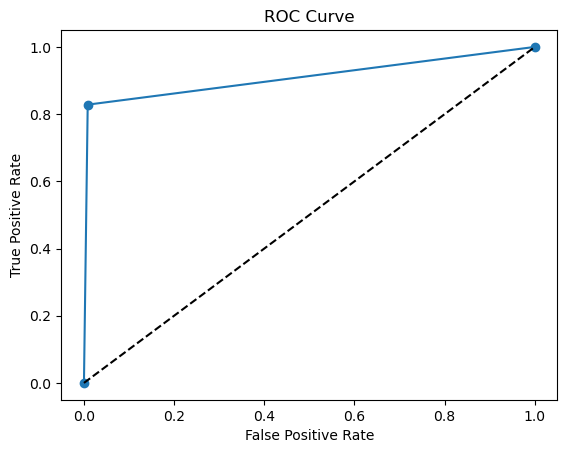

In [45]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with linear kernel

In [46]:
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with linear kernel is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with linear kernel is: 0.9776536312849162


Training set score: 0.9753542207144282
Test set score: 0.9776536312849162

True Positives(TP) =  2272

True Negatives(TN) =  178

False Positives(FP) =  7

False Negatives(FN) =  49


<AxesSubplot:>

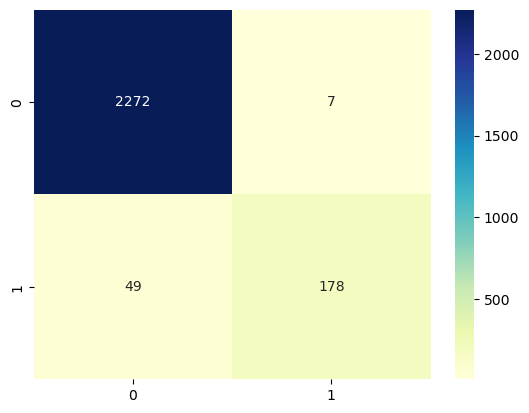

In [47]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

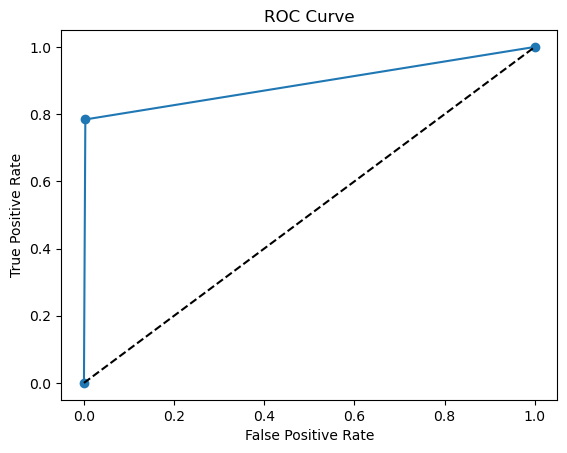

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with linear kernel with C = 1.0

In [49]:
svc = SVC(kernel = 'linear', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with linear kernel and c = 1.0 is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with linear kernel and c = 1.0 is: 0.9776536312849162


Training set score: 0.9753542207144282
Test set score: 0.9776536312849162

True Positives(TP) =  2272

True Negatives(TN) =  178

False Positives(FP) =  7

False Negatives(FN) =  49


<AxesSubplot:>

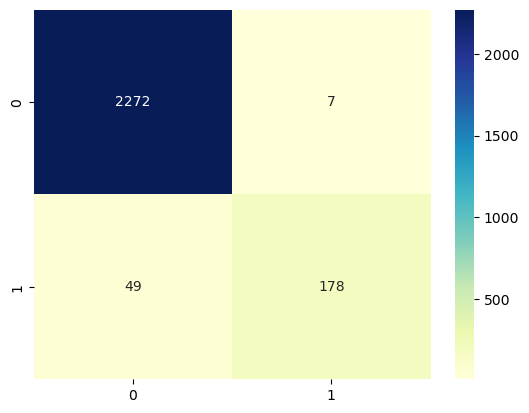

In [50]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

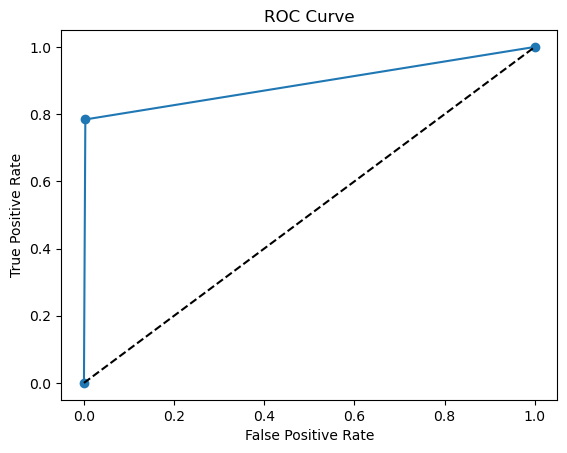

In [51]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with linear kernel with C = 100.0

In [52]:
svc = SVC(kernel = 'linear', C = 100.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with linear kernel and c = 100.0 is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with linear kernel and c = 100.0 is: 0.9780526735833999


Training set score: 0.9754540011973658
Test set score: 0.9780526735833999

True Positives(TP) =  2272

True Negatives(TN) =  179

False Positives(FP) =  7

False Negatives(FN) =  48


<AxesSubplot:>

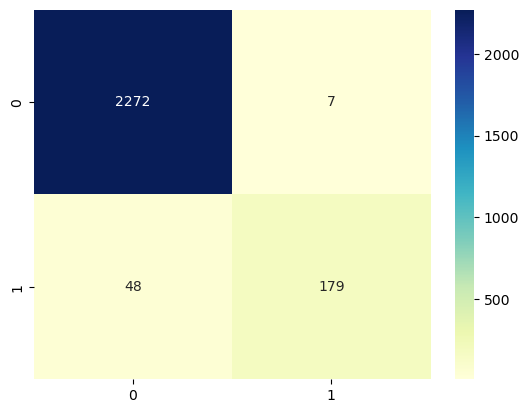

In [53]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

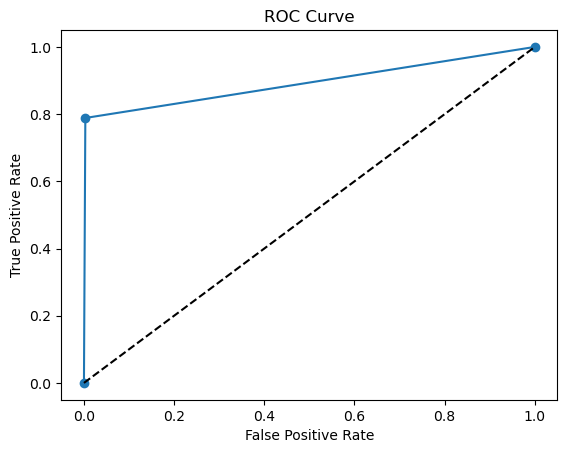

In [54]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with linear kernel with C = 1000.0

In [55]:
svc = SVC(kernel = 'linear', C = 100.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with linear kernel and c = 1000.0 is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with linear kernel and c = 1000.0 is: 0.9780526735833999


Training set score: 0.9754540011973658
Test set score: 0.9780526735833999

True Positives(TP) =  2272

True Negatives(TN) =  179

False Positives(FP) =  7

False Negatives(FN) =  48


<AxesSubplot:>

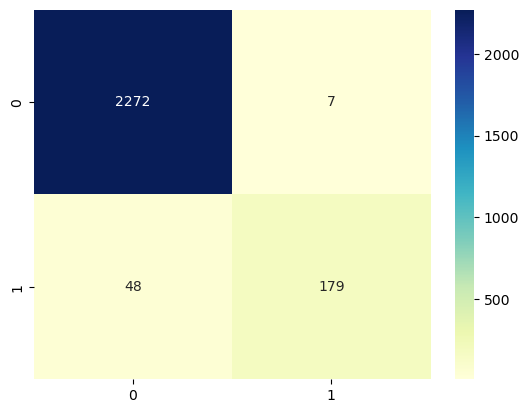

In [56]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

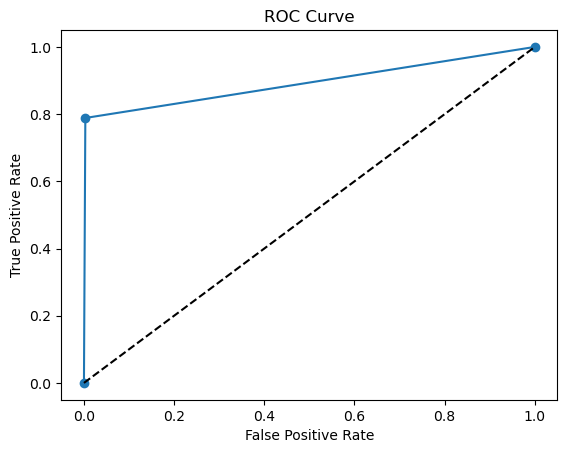

In [57]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with polynomial kernel

In [58]:
svc = SVC(kernel = 'poly')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with polynomial kernel is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with polynomial kernel is: 0.975658419792498


Training set score: 0.9752544402314908
Test set score: 0.975658419792498

True Positives(TP) =  2275

True Negatives(TN) =  170

False Positives(FP) =  4

False Negatives(FN) =  57


<AxesSubplot:>

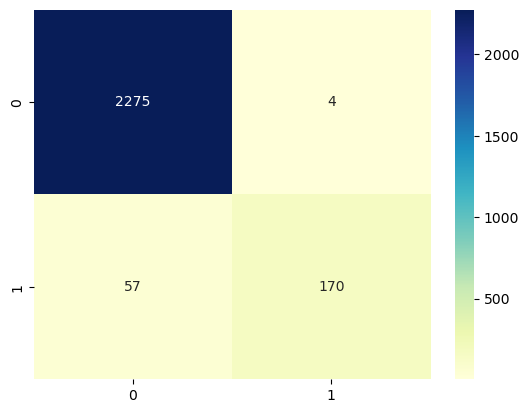

In [59]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

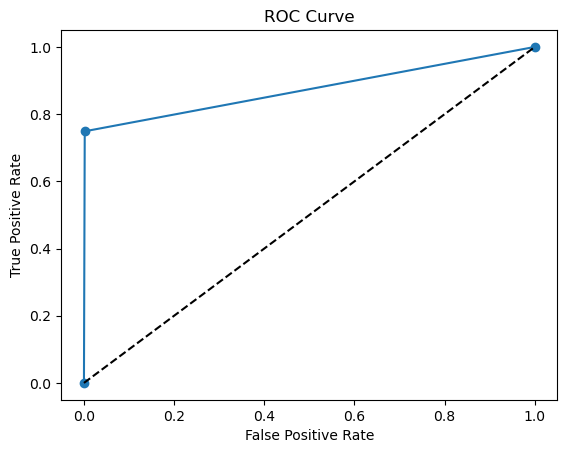

In [60]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with polynomial kernel with C = 1.0

In [61]:
svc = SVC(kernel = 'poly', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with polynomial kernel with C = 1.0 is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with polynomial kernel with C = 1.0 is: 0.975658419792498


Training set score: 0.9752544402314908
Test set score: 0.975658419792498

True Positives(TP) =  2275

True Negatives(TN) =  170

False Positives(FP) =  4

False Negatives(FN) =  57


<AxesSubplot:>

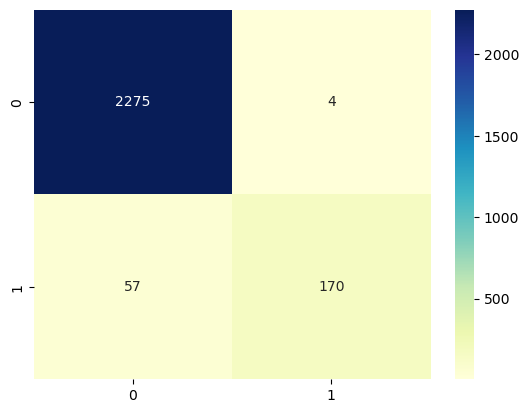

In [62]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

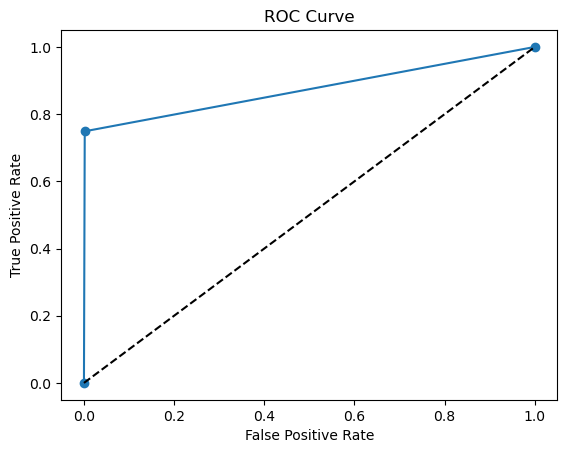

In [63]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with polynomial kernel with C = 100.0

In [64]:
svc = SVC(kernel = 'poly', C = 100.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with polynomial kernel with C = 100.0 is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with polynomial kernel with C = 100.0 is: 0.9820430965682362


Training set score: 0.978646976651367
Test set score: 0.9820430965682362

True Positives(TP) =  2271

True Negatives(TN) =  190

False Positives(FP) =  8

False Negatives(FN) =  37


<AxesSubplot:>

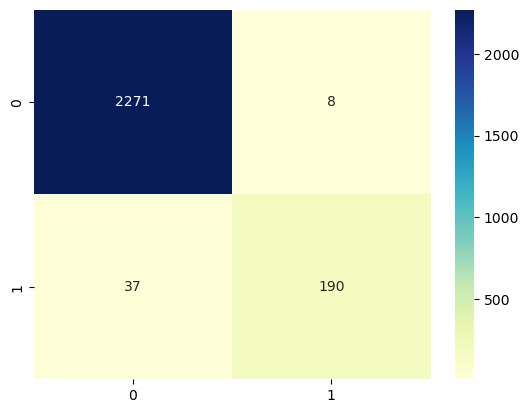

In [65]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

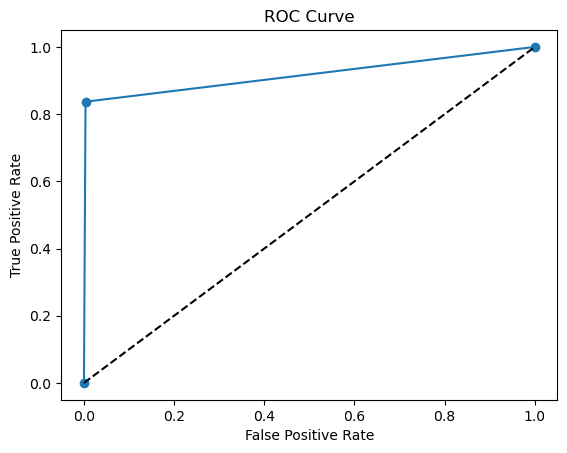

In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with polynomial kernel with C = 1000.0

In [67]:
svc = SVC(kernel = 'poly', C = 100.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with polynomial kernel with C = 1000.0 is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with polynomial kernel with C = 1000.0 is: 0.9820430965682362


Training set score: 0.978646976651367
Test set score: 0.9820430965682362

True Positives(TP) =  2271

True Negatives(TN) =  190

False Positives(FP) =  8

False Negatives(FN) =  37


<AxesSubplot:>

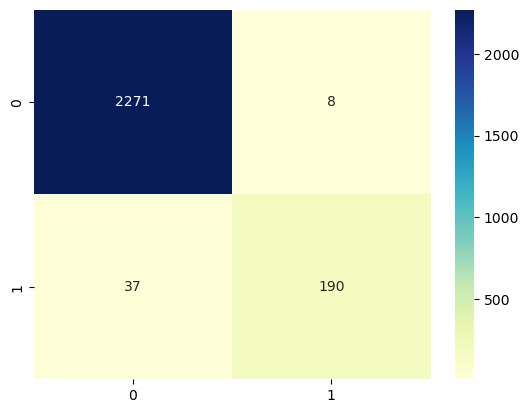

In [68]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

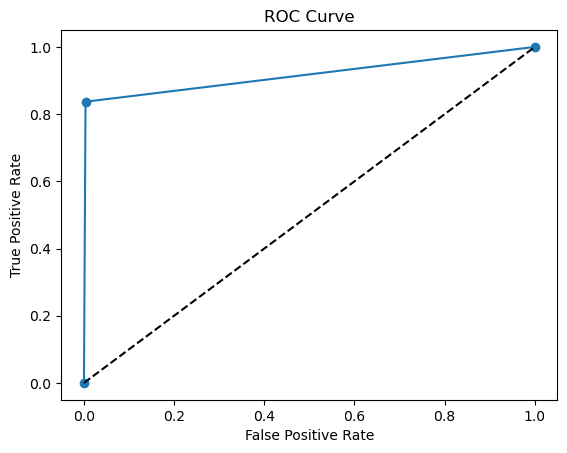

In [69]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with sigmoid kernel

In [70]:
svc = SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with sigmoid kernel is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with sigmoid kernel is: 0.8743016759776536


Training set score: 0.8717820794252644
Test set score: 0.8743016759776536

True Positives(TP) =  2123

True Negatives(TN) =  68

False Positives(FP) =  156

False Negatives(FN) =  159


<AxesSubplot:>

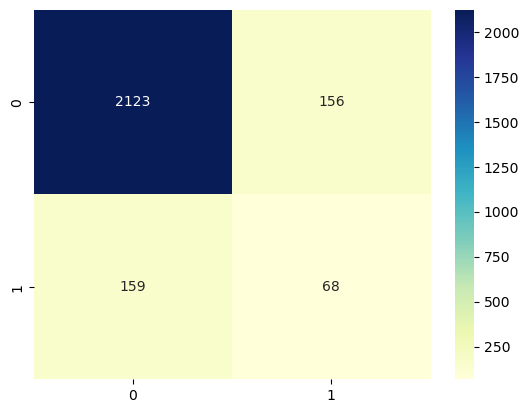

In [71]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

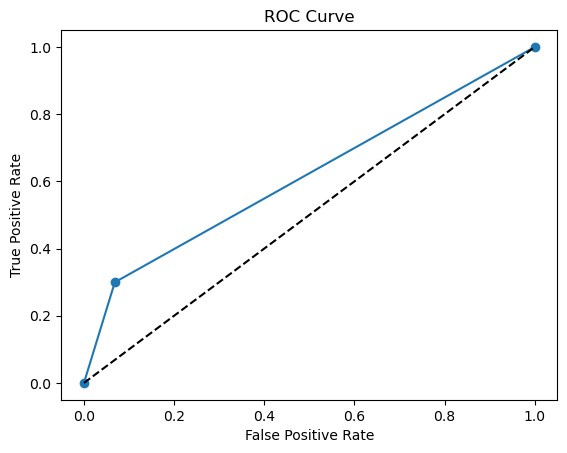

In [72]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with sigmoid kernel with C = 1.0

In [73]:
svc = SVC(kernel = 'sigmoid', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with sigmoid kernel with C = 1.0 is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with sigmoid kernel with C = 1.0 is: 0.8743016759776536


Training set score: 0.8717820794252644
Test set score: 0.8743016759776536

True Positives(TP) =  2123

True Negatives(TN) =  68

False Positives(FP) =  156

False Negatives(FN) =  159


<AxesSubplot:>

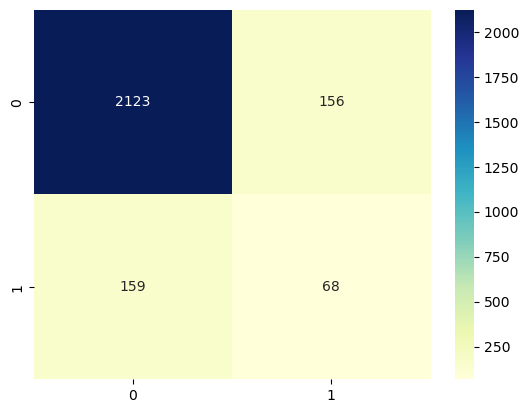

In [74]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

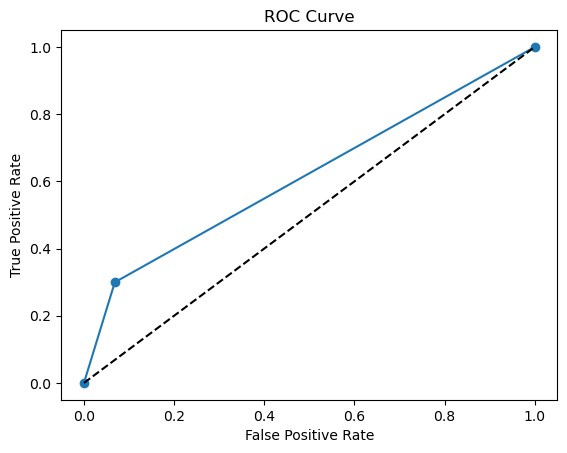

In [75]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with sigmoid kernel with C = 100.0

In [76]:
svc = SVC(kernel = 'sigmoid', C = 100.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with sigmoid kernel with C = 100.0 is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with sigmoid kernel with C = 100.0 is: 0.8743016759776536


Training set score: 0.8711833965276392
Test set score: 0.8743016759776536

True Positives(TP) =  2122

True Negatives(TN) =  69

False Positives(FP) =  157

False Negatives(FN) =  158


<AxesSubplot:>

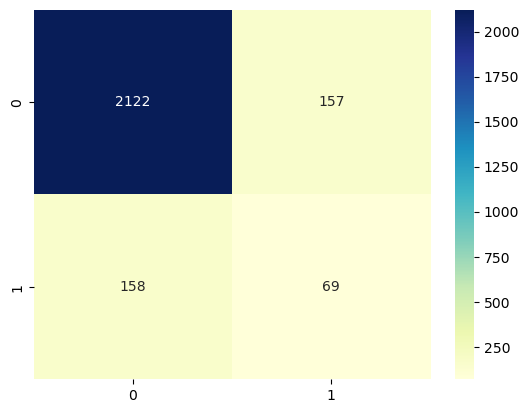

In [77]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

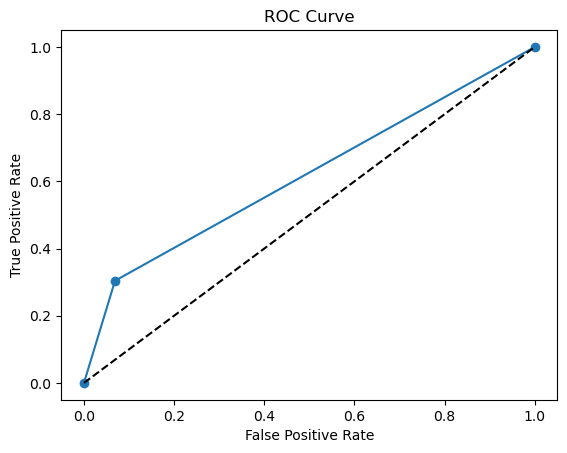

In [78]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with sigmoid kernel with C = 1000.0

In [79]:
svc = SVC(kernel = 'sigmoid', C = 1000.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy score of SVM with sigmoid kernel with C = 1000.0 is: {accuracy_score(y_test, y_pred)}")

The accuracy score of SVM with sigmoid kernel with C = 1000.0 is: 0.8743016759776536


Training set score: 0.8710836160447016
Test set score: 0.8743016759776536

True Positives(TP) =  2122

True Negatives(TN) =  69

False Positives(FP) =  157

False Negatives(FN) =  158


<AxesSubplot:>

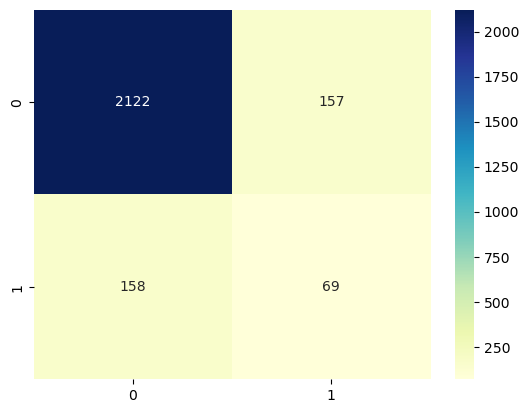

In [80]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

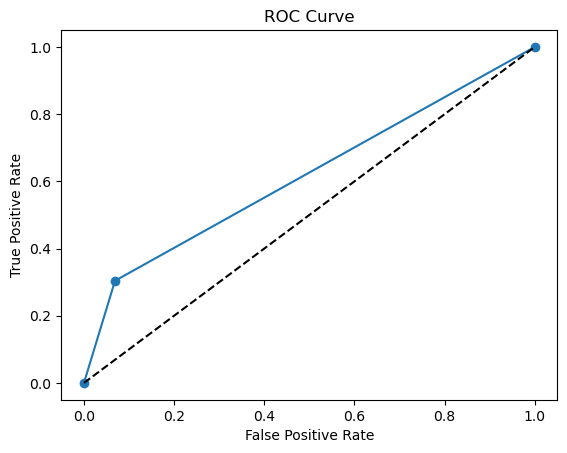

In [81]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [83]:
linear_scores

array([0.97765363, 0.97765363, 0.9764565 , 0.9752495 , 0.9760479 ])

In [84]:
linear_scores.mean()

0.9766122344297837

In [85]:
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [86]:
rbf_scores.mean()

0.9778094569042283

In [87]:
poly_svc=SVC(kernel='poly')
poly_scores = cross_val_score(poly_svc, X, y, cv=kfold)

In [88]:
poly_scores.mean()

0.9739781092244881

In [89]:
sig_svc=SVC(kernel='sigmoid')
sig_scores=cross_val_score(sig_svc,X,y,cv=kfold)

In [90]:
sig_scores.mean()

0.8708498087623635

## Dataset 2

### Importing Dataset

In [91]:
df = pd.read_csv("income_evaluation.csv")

In [92]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Exploring the Data and Cleaning it

In [93]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [95]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Label Encoding

In [96]:
le = LabelEncoder()

In [97]:
df.select_dtypes(include = "object").columns

Index([' workclass', ' education', ' marital-status', ' occupation',
       ' relationship', ' race', ' sex', ' native-country', ' income'],
      dtype='object')

In [98]:
cols = [' workclass', ' education', ' marital-status', ' occupation',
       ' relationship', ' race', ' sex', ' native-country', ' income']

for col in cols:
    df[col] = le.fit_transform(df[col])

In [99]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


#### Checking and Removing for outlier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


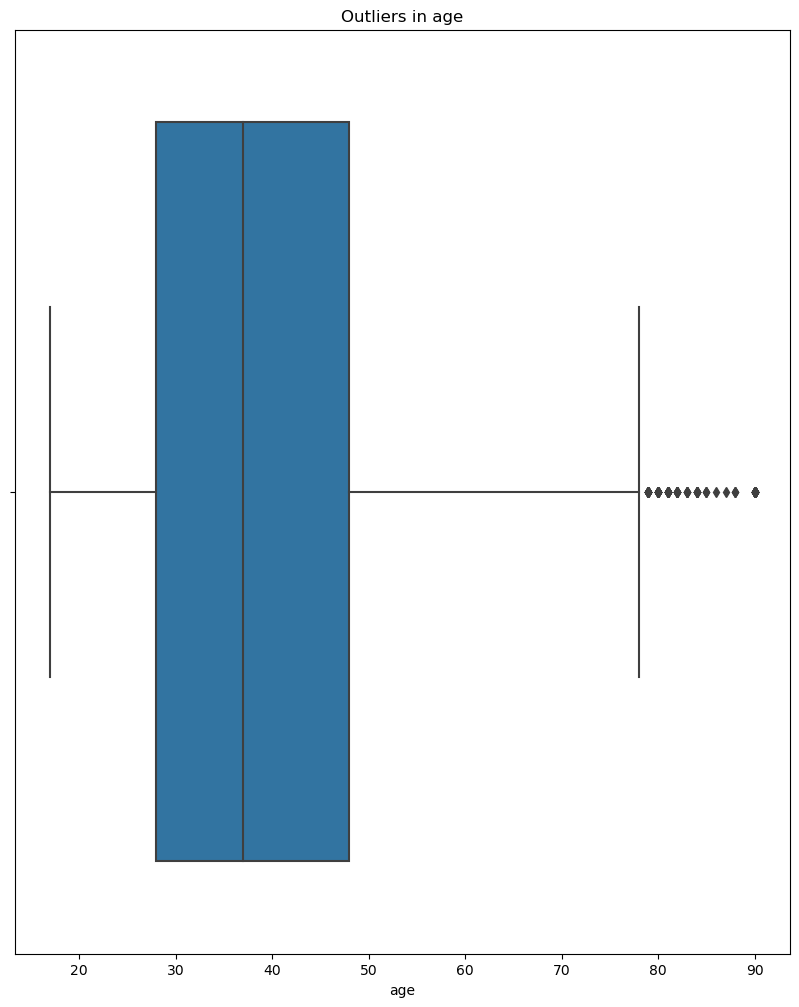

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


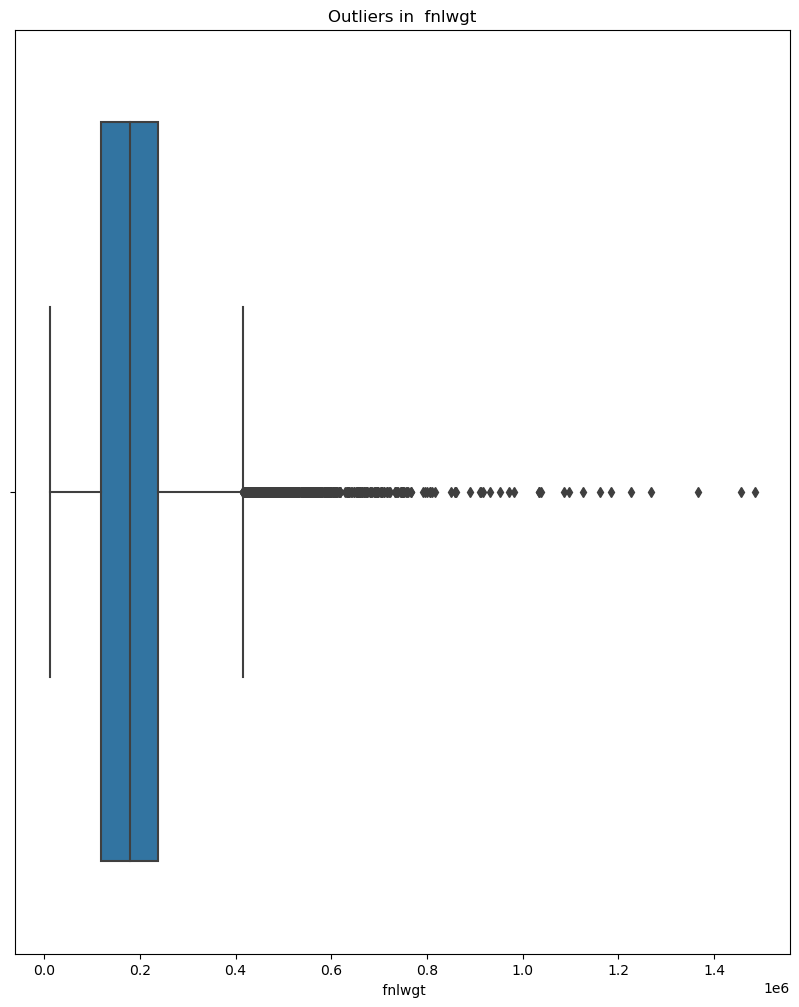

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


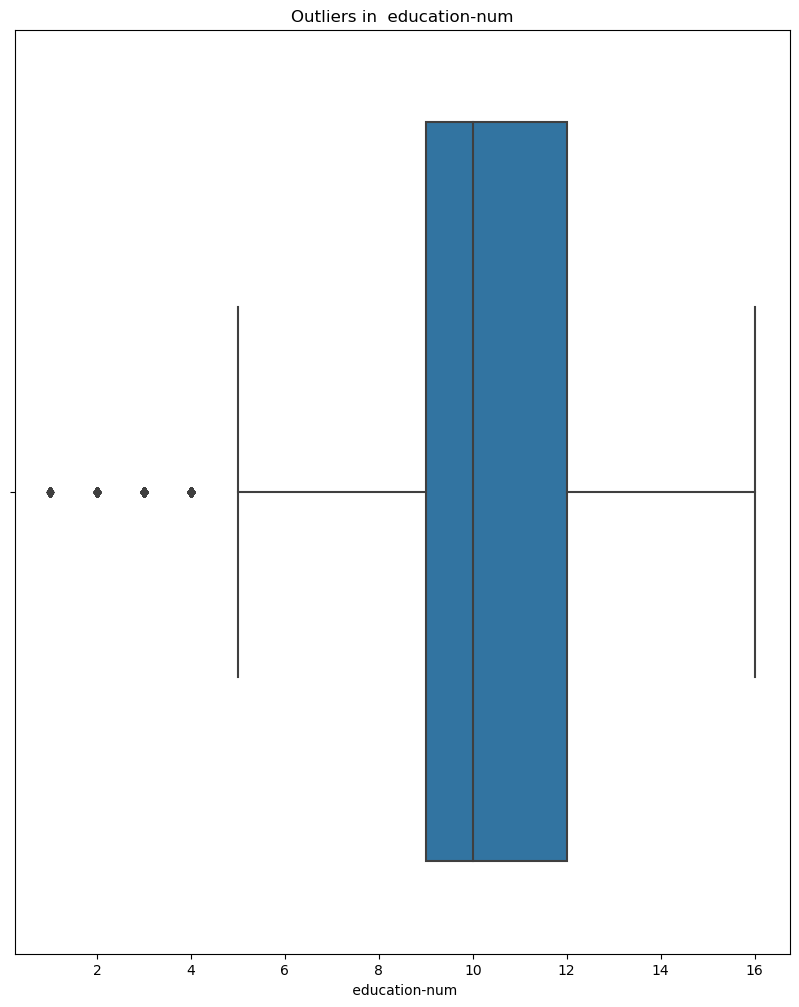

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


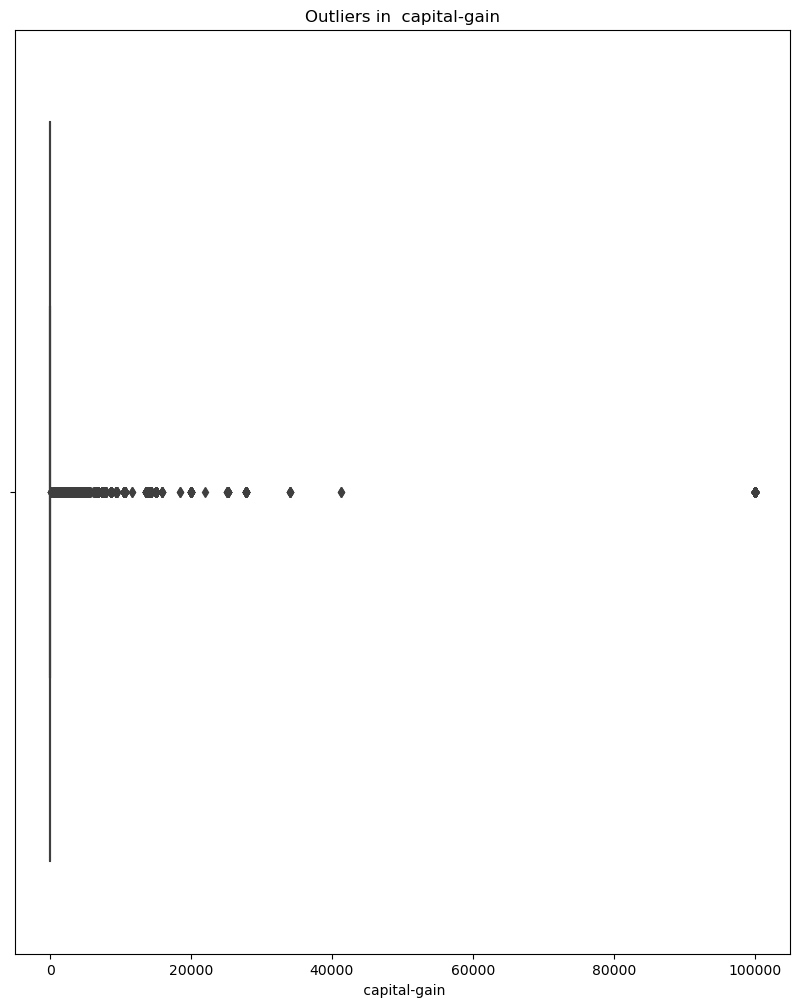

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


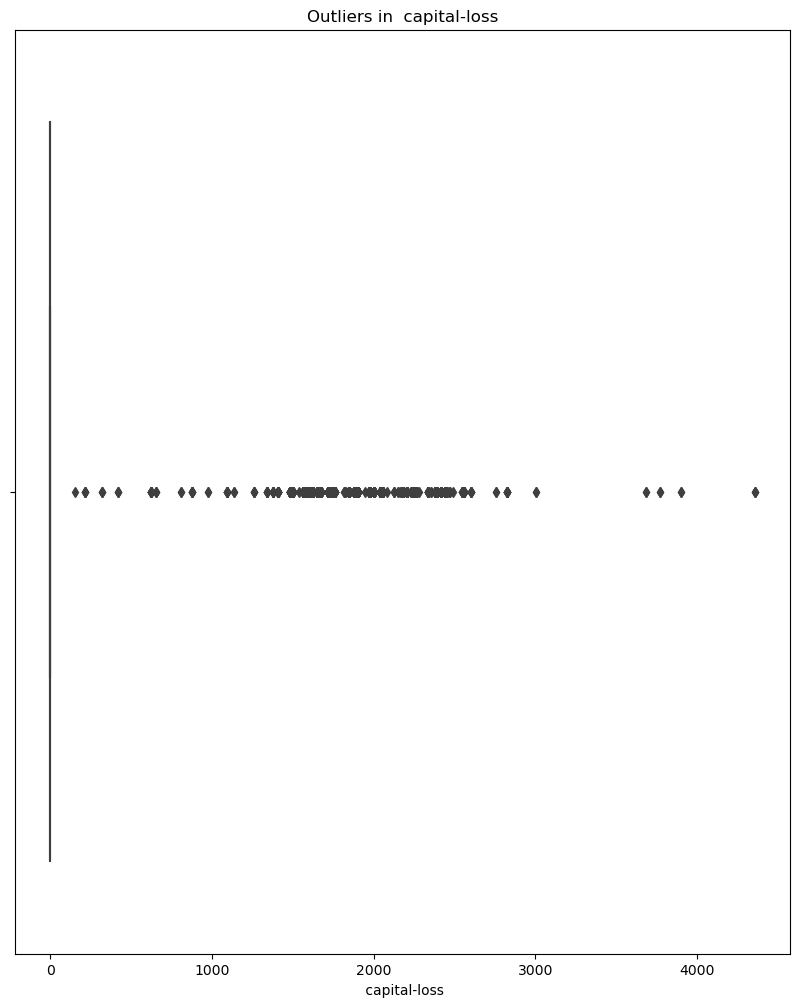

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


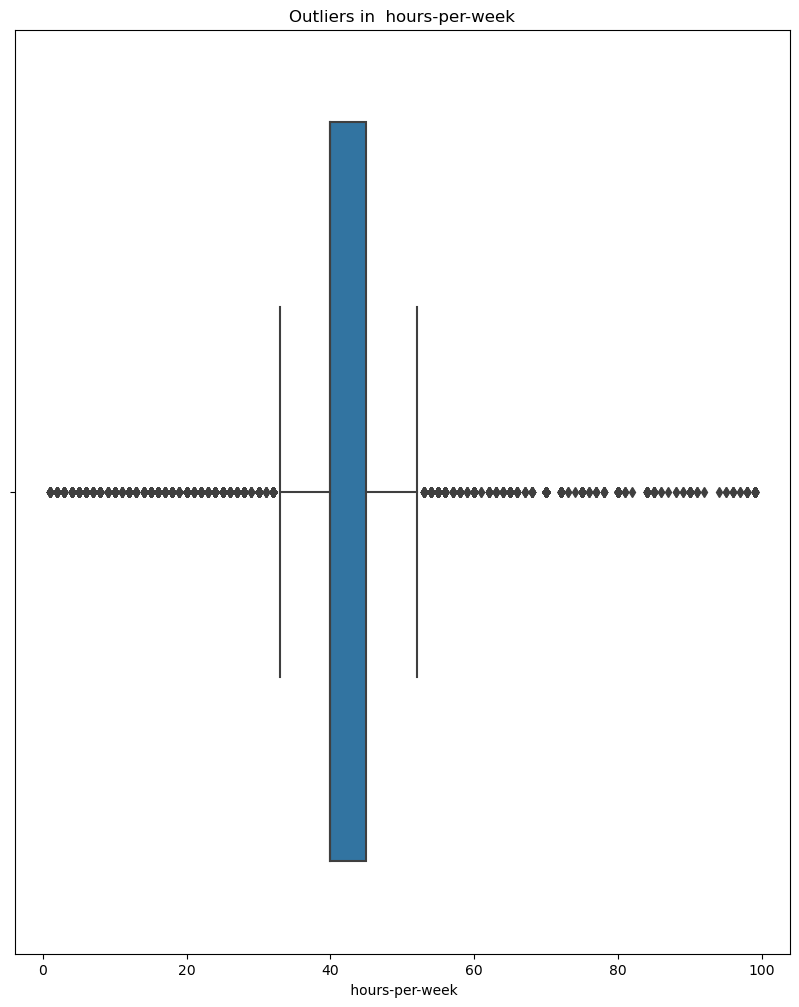

In [100]:
cols = ['age', ' fnlwgt', ' education-num',
       ' capital-gain', ' capital-loss', ' hours-per-week']

for col in cols:
    plt.figure(figsize = (10, 12))
    sns.boxplot(df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [101]:
def outlier_rem(df, col) :
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)

    IQR = Q3-Q1

    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    outliers = (df[col]<lower) | (df[col]>upper)

    df.loc[outliers, col] = np.mean(df[col])

In [102]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [103]:
cols = ['age', ' fnlwgt', ' education-num',
       ' capital-gain', ' capital-loss', ' hours-per-week']

for col in cols:
    outlier_rem(df, col)

In [104]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,7,77516.0,9,13.0,4,1,1,4,1,1077.648844,0.0,40.000000,39,0
1,50.0,6,83311.0,9,13.0,2,4,0,4,1,0.000000,0.0,40.437456,39,0
2,38.0,4,215646.0,11,9.0,0,6,1,4,1,0.000000,0.0,40.000000,39,0
3,53.0,4,234721.0,1,7.0,2,6,0,2,1,0.000000,0.0,40.000000,39,0
4,28.0,4,338409.0,9,13.0,2,10,5,2,0,0.000000,0.0,40.000000,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,257302.0,7,12.0,2,13,5,4,0,0.000000,0.0,38.000000,39,0
32557,40.0,4,154374.0,11,9.0,2,7,0,4,1,0.000000,0.0,40.000000,39,1
32558,58.0,4,151910.0,11,9.0,6,1,4,4,0,0.000000,0.0,40.000000,39,0
32559,22.0,4,201490.0,11,9.0,4,1,3,4,1,0.000000,0.0,40.437456,39,0


In [105]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.382487,3.868892,179940.477399,10.298210,10.329648,2.611836,6.572740,1.446362,3.665858,0.669205,89.757184,4.072802,41.253451,36.718866,0.240810
std,13.300584,1.455960,86046.132517,3.870264,2.201019,1.506222,4.228857,1.606771,0.848806,0.470506,297.780283,18.411788,3.452517,7.823782,0.427581
min,17.000000,0.000000,12285.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000
25%,28.000000,4.000000,117827.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,178356.000000,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,47.000000,4.000000,226196.000000,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.437456,39.000000,0.000000
max,78.000000,8.000000,415847.000000,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,1077.648844,87.303830,52.000000,41.000000,1.000000


#### Checking Distribution

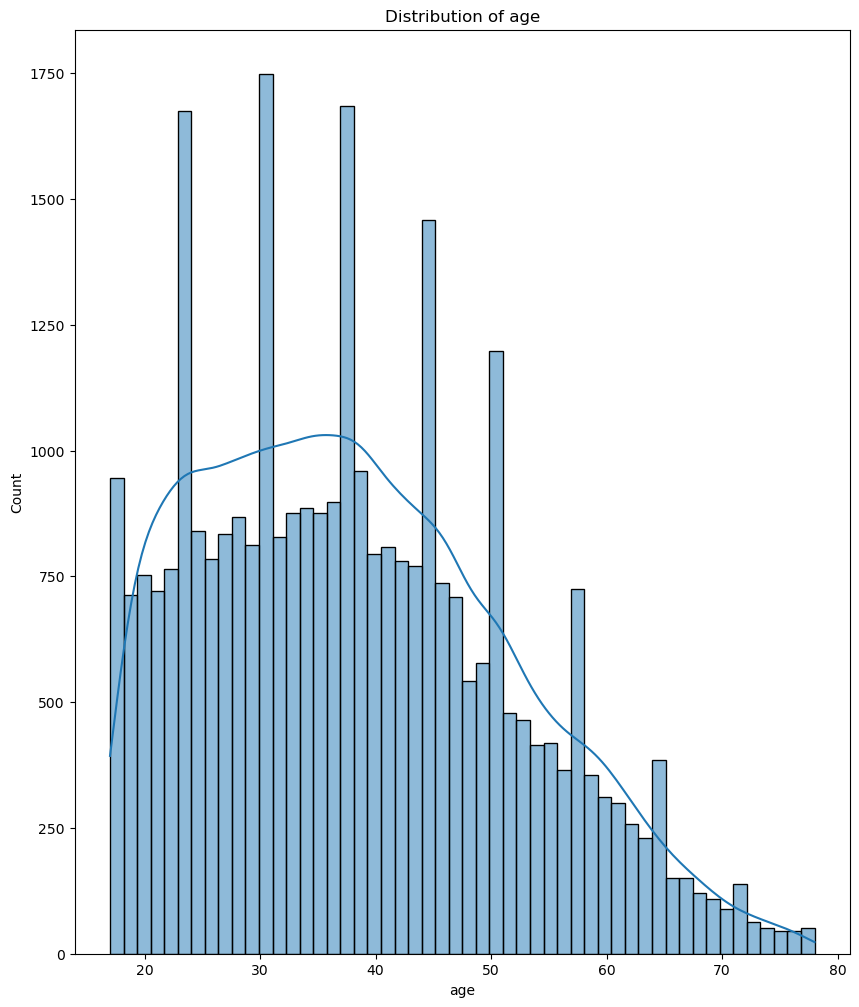

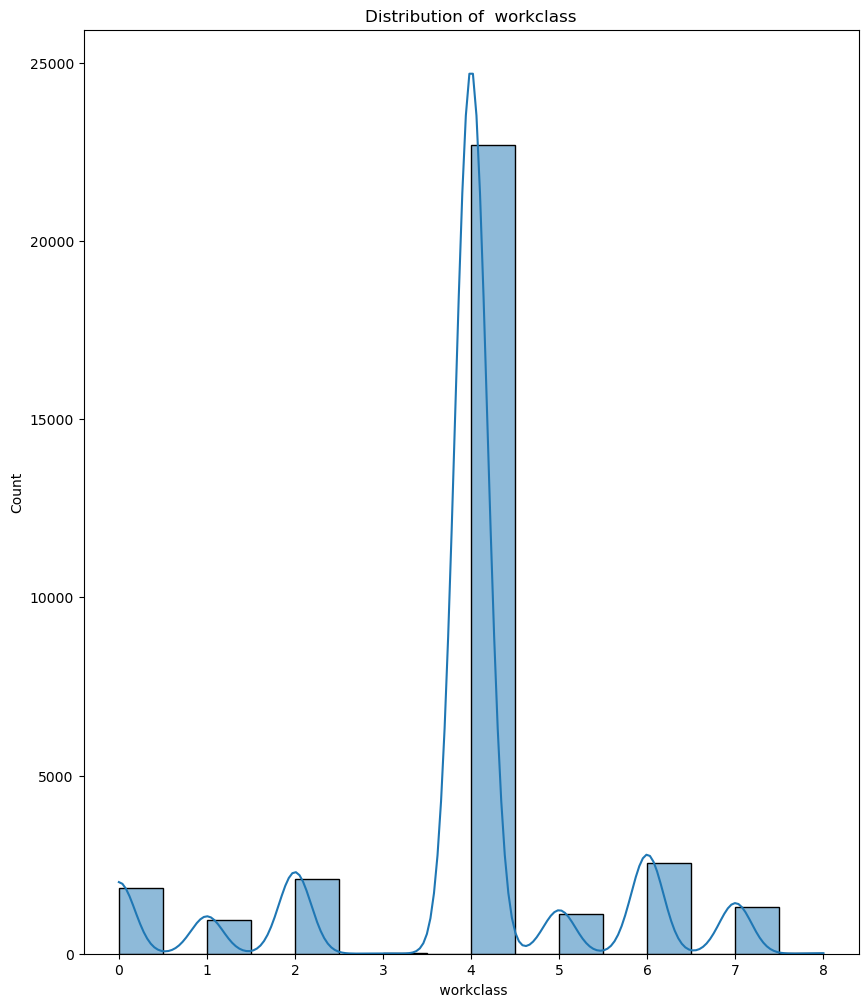

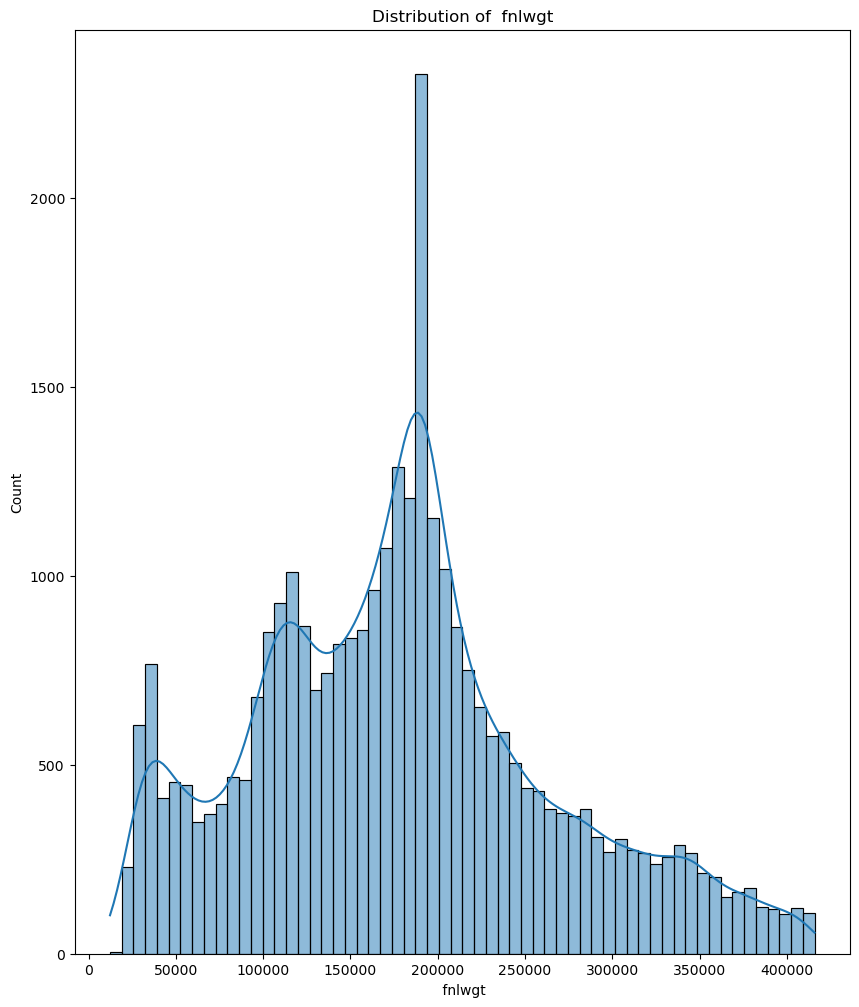

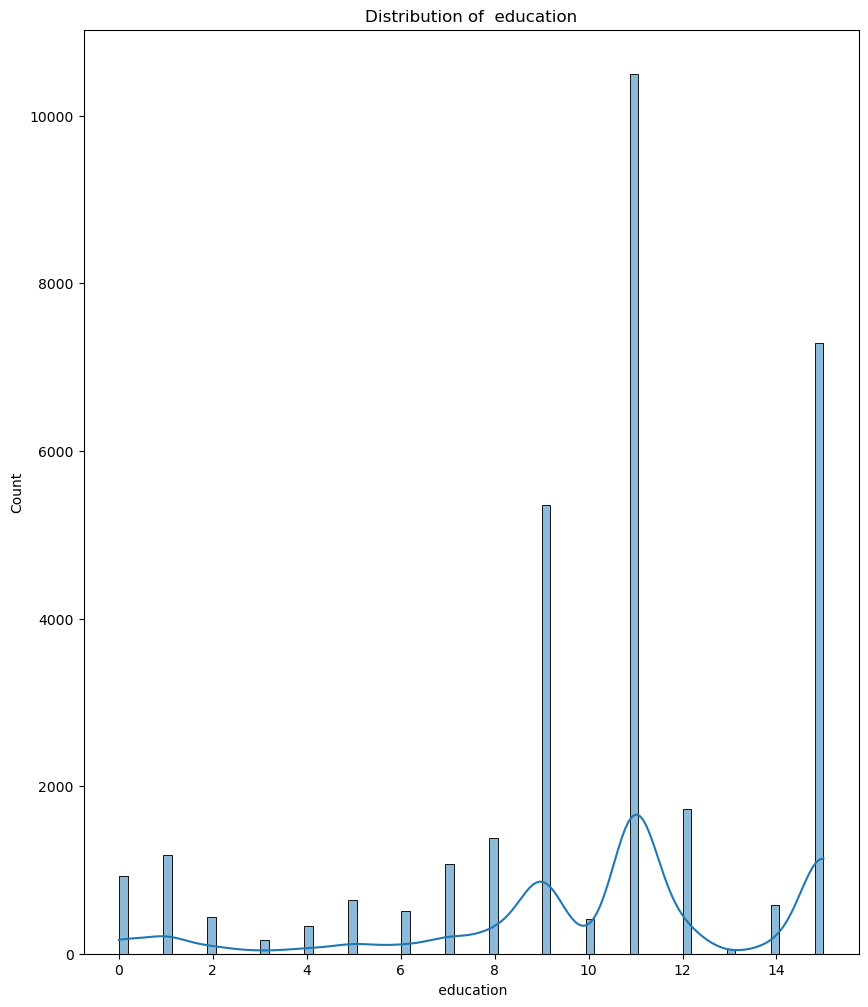

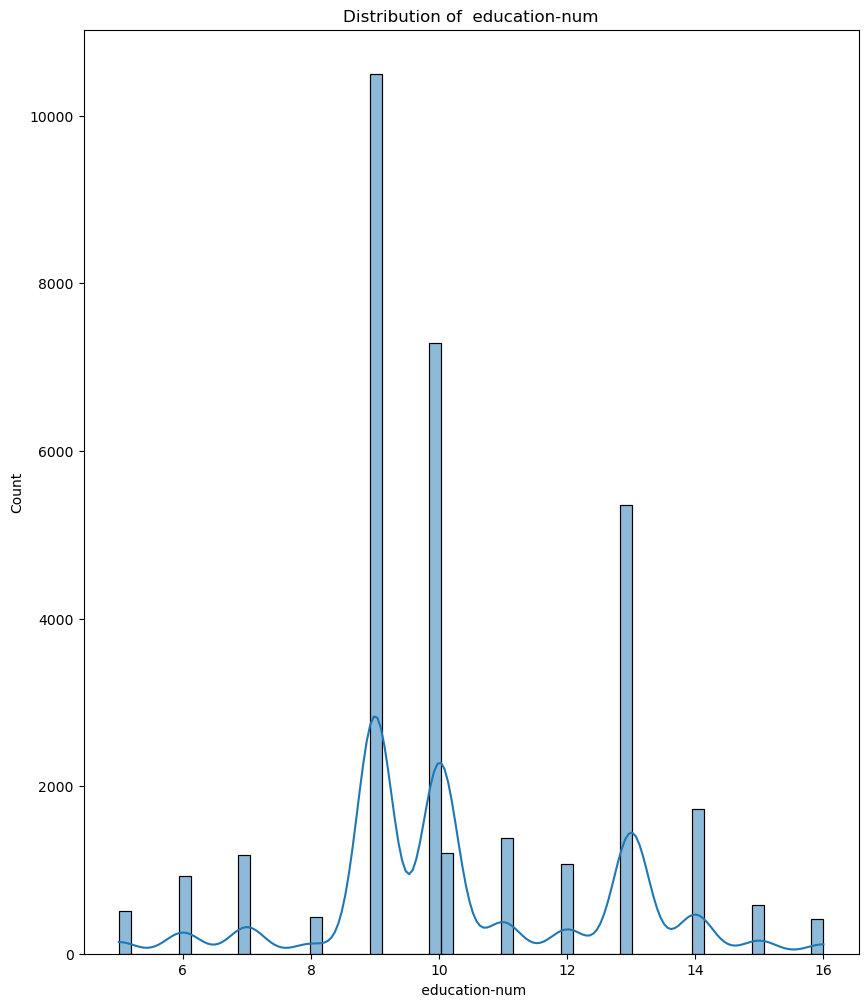

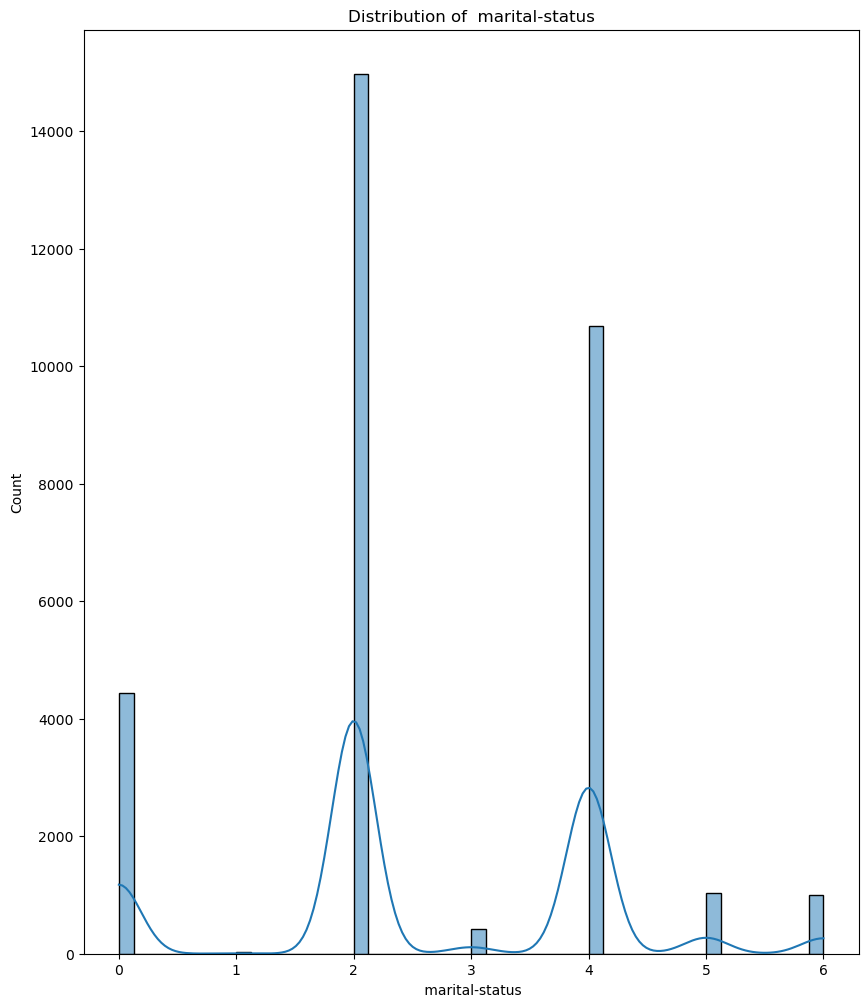

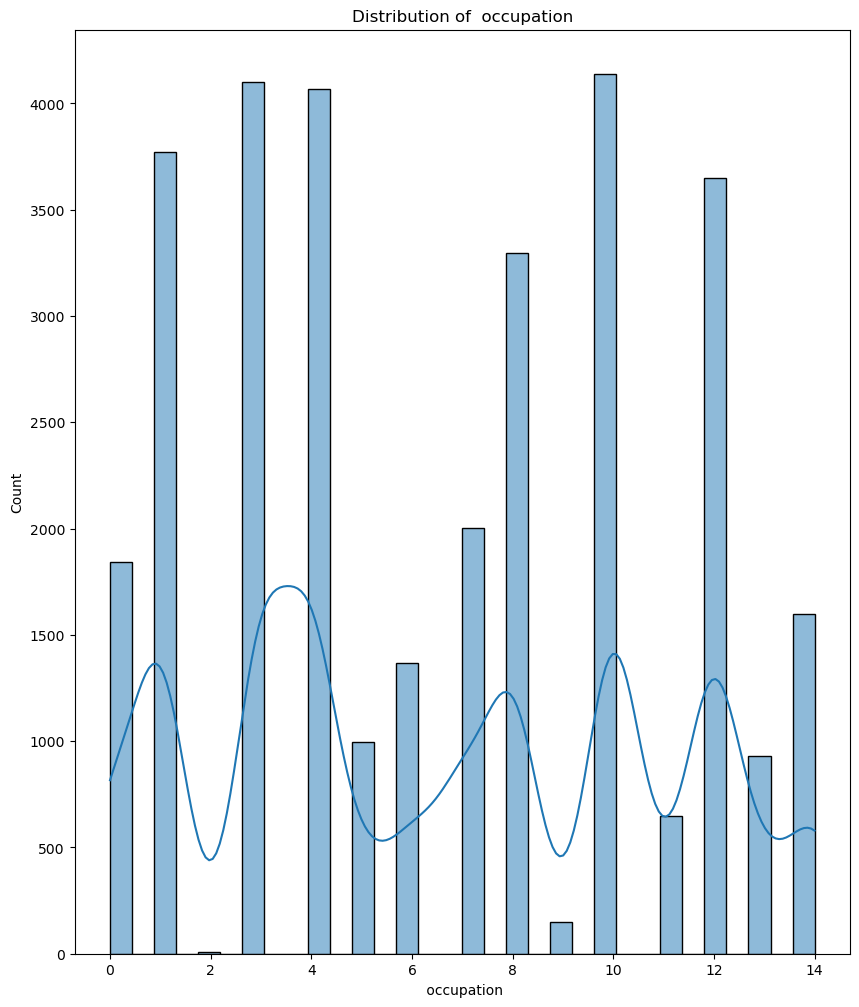

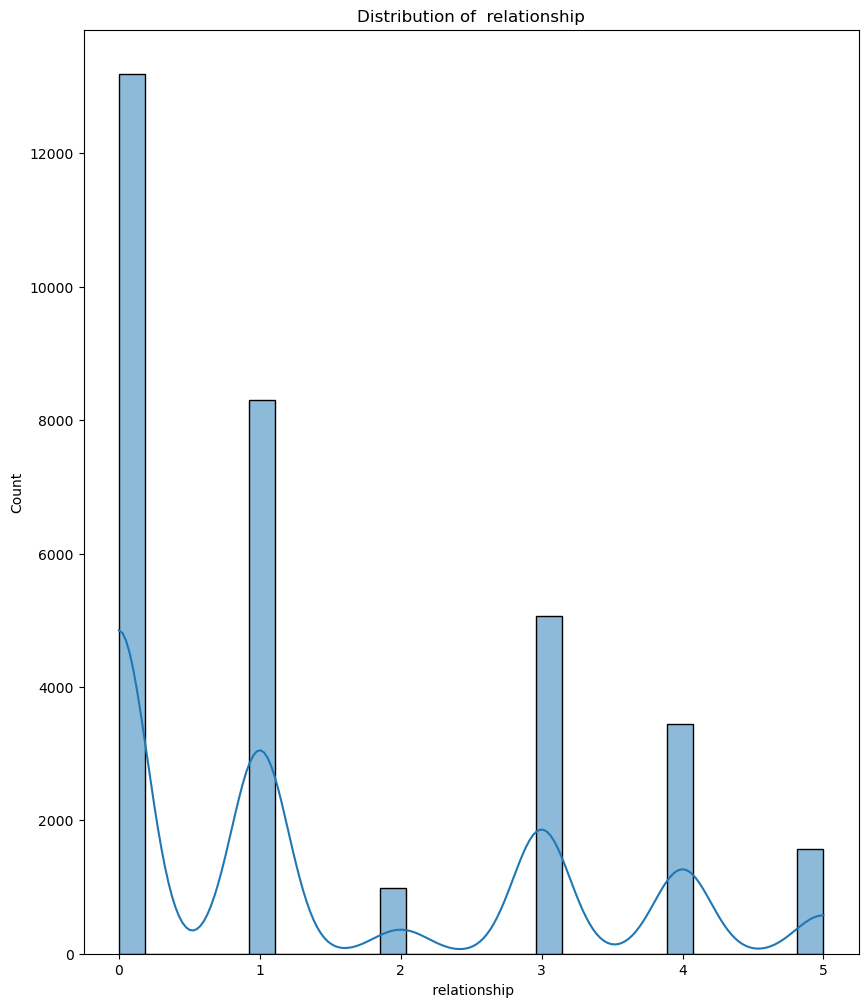

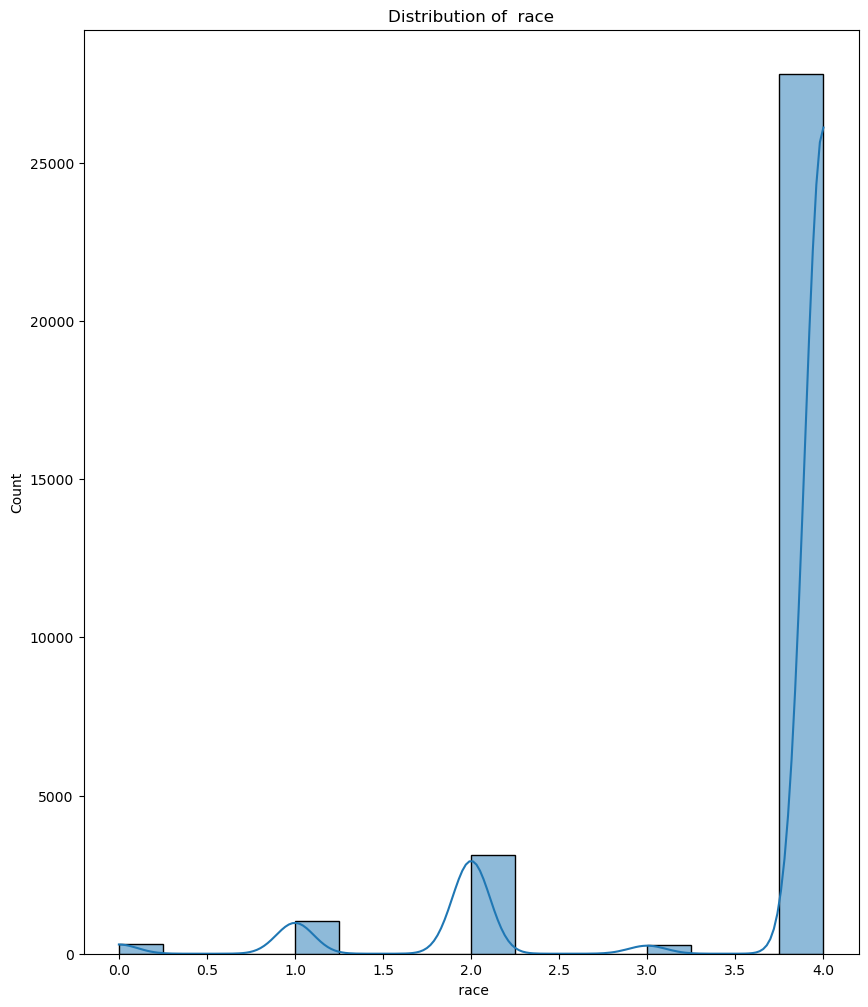

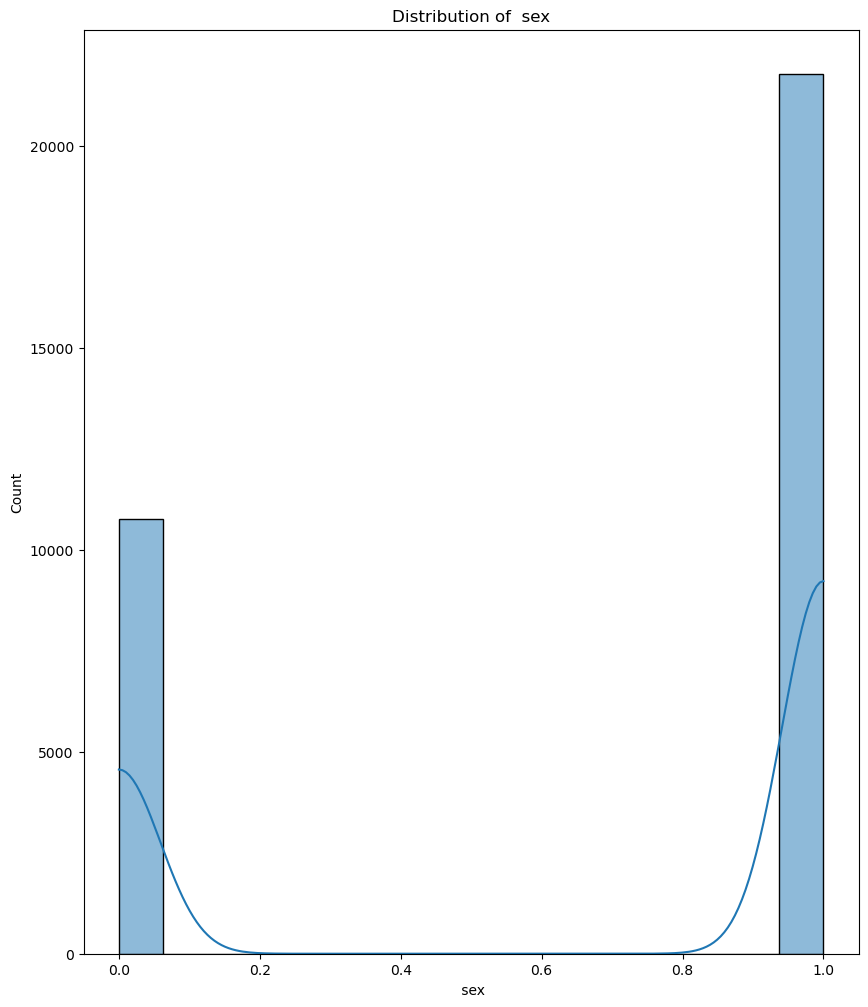

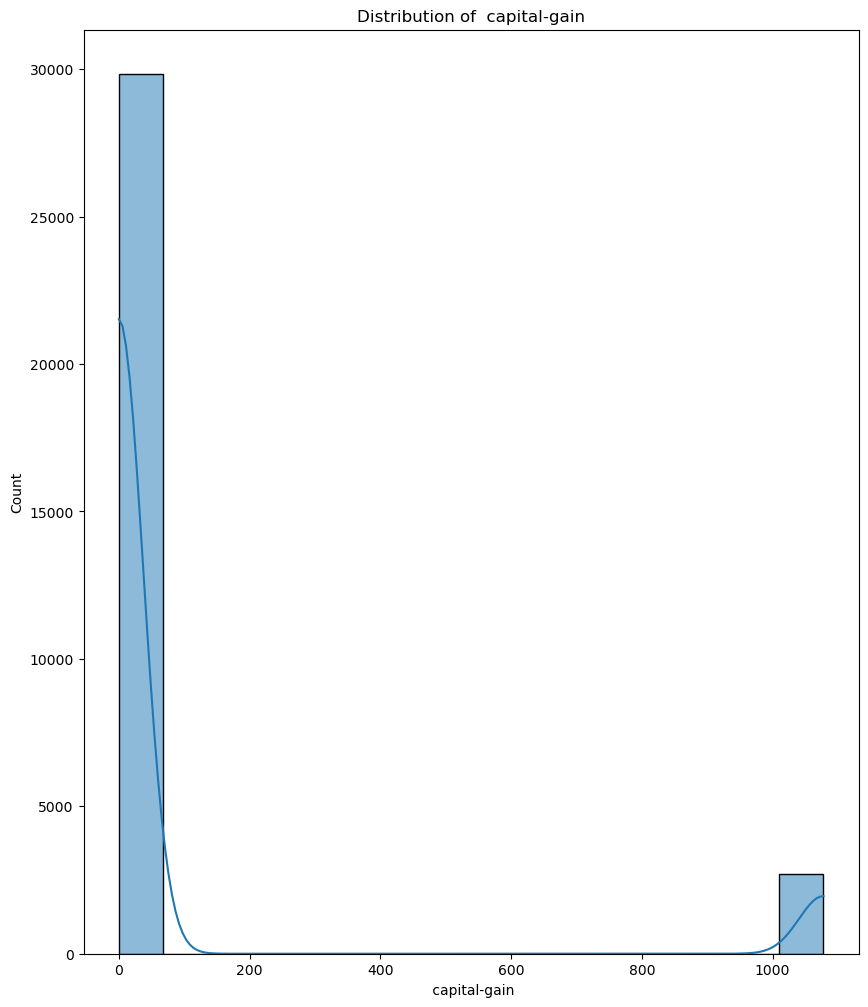

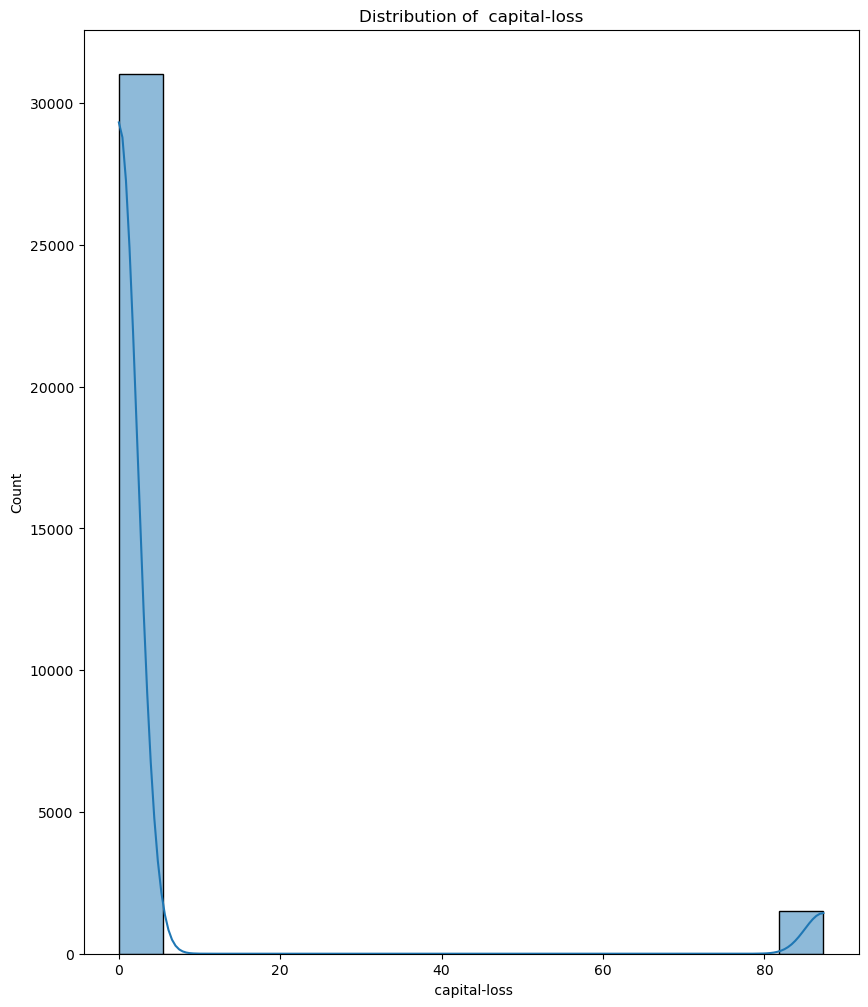

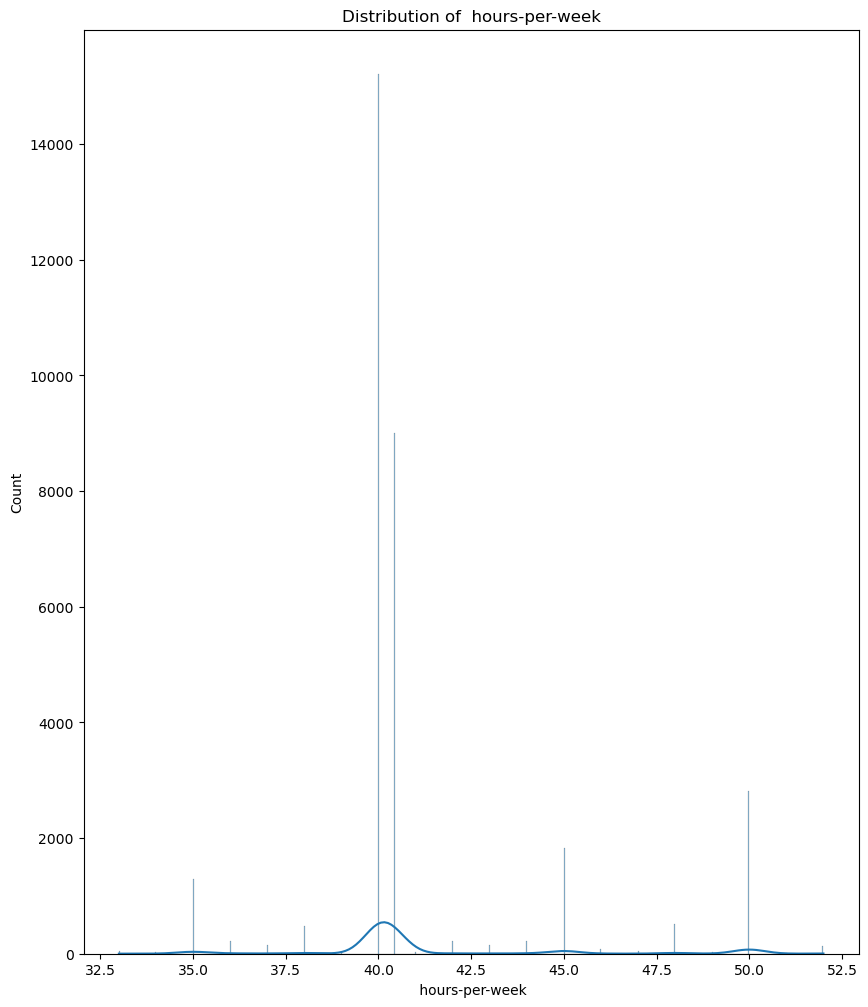

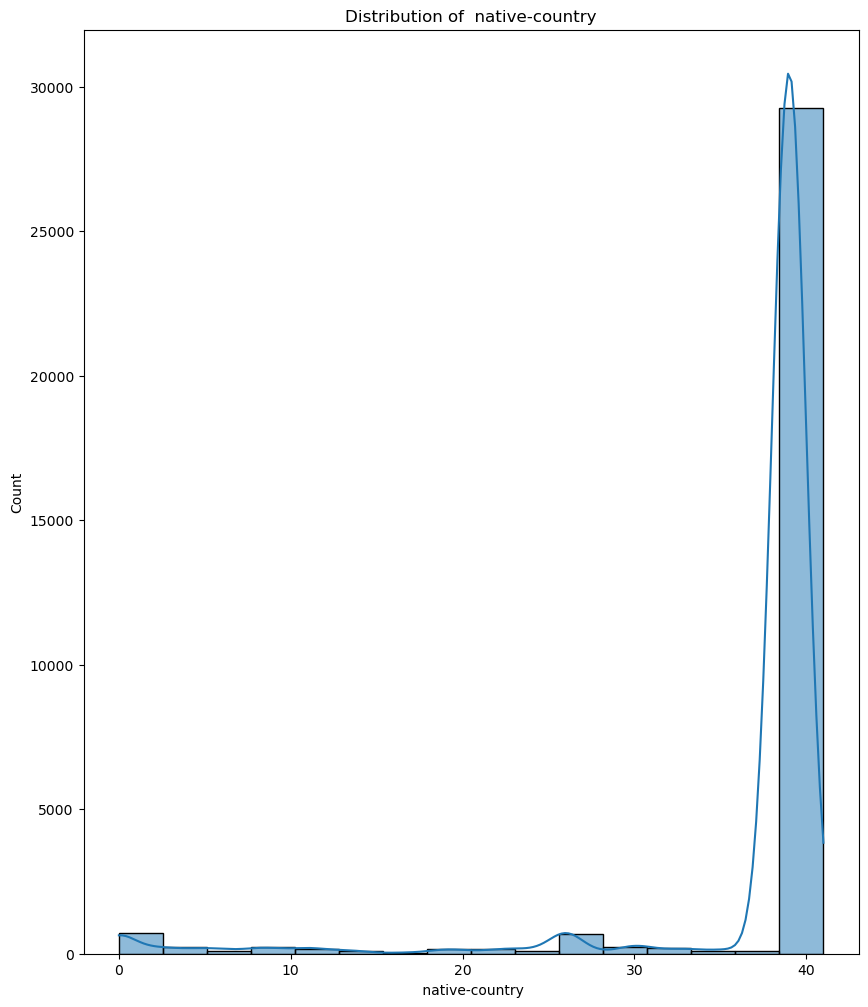

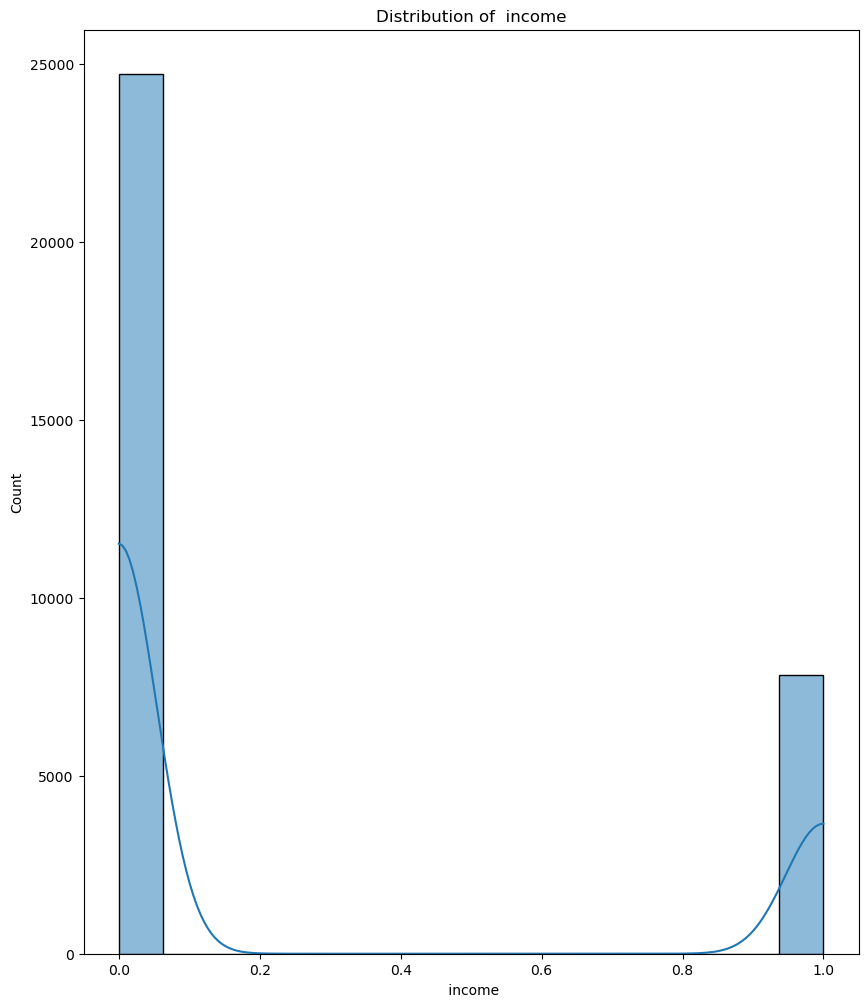

In [106]:
for col in df.columns:
    plt.figure(figsize = (10, 12))
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()

### Feature Scaling

In [107]:
sc = StandardScaler()

In [108]:
# Note: Standard Scaler imput dimensions are 2D

In [109]:
cols = ['age', ' fnlwgt', ' education-num',
       ' capital-gain', ' capital-loss', ' hours-per-week']

df[cols] = sc.fit_transform(df[cols])

### Divison into Training and Test Sets

In [110]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.046428,7,-1.190362,9,1.213253,4,1,1,4,1,3.317570,-0.22121,-0.363060,39,0
1,0.873472,6,-1.123013,9,1.213253,2,4,0,4,1,-0.301425,-0.22121,-0.236351,39,0
2,-0.028758,4,0.414964,11,-0.604115,0,6,1,4,1,-0.301425,-0.22121,-0.363060,39,0
3,1.099030,4,0.636651,1,-1.512798,2,6,0,2,1,-0.301425,-0.22121,-0.363060,39,0
4,-0.780616,4,1.841698,9,1.213253,2,10,5,2,0,-0.301425,-0.22121,-0.363060,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.855802,4,0.899084,7,0.758911,2,13,5,4,0,-0.301425,-0.22121,-0.942356,39,0
32557,0.121614,4,-0.297130,11,-0.604115,2,7,0,4,1,-0.301425,-0.22121,-0.363060,39,1
32558,1.474959,4,-0.325766,11,-0.604115,6,1,4,4,0,-0.301425,-0.22121,-0.363060,39,0
32559,-1.231731,4,0.250445,11,-0.604115,4,1,3,4,1,-0.301425,-0.22121,-0.236351,39,0


In [111]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [112]:
X = df.drop(columns = ' income')
y = df[' income']

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [114]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
5514,-0.404687,2,0.212012,9,1.213253,4,10,1,4,0,-0.301425,-0.221210,2.533423,39
19777,-0.179129,4,-1.086428,8,0.304569,2,4,0,4,1,-0.301425,4.520599,2.533423,39
10781,1.474959,6,0.268448,6,-2.421482,5,3,1,4,1,-0.301425,-0.221210,-0.363060,39
32240,-1.306917,4,0.002900,8,0.304569,2,5,0,4,1,-0.301425,-0.221210,1.374830,39
9876,-0.855802,4,1.161389,15,-0.149773,0,8,1,4,1,-0.301425,-0.221210,-0.363060,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.647915,4,2.086361,9,1.213253,2,3,0,4,1,-0.301425,-0.221210,-0.363060,39
5390,-0.555058,4,-0.380331,2,-1.058457,0,8,4,4,0,-0.301425,-0.221210,-0.236351,39
860,-1.532474,4,0.422379,1,-1.512798,4,1,3,4,0,-0.301425,-0.221210,-0.236351,39
15795,0.873472,6,-1.460628,11,-0.604115,2,5,0,4,1,-0.301425,-0.221210,-0.236351,39


### Running SVM with default Hyper-parameters

In [115]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with default hyper-parameters is :{accuracy_score(y_test, y_pred)}")

The accuracy of SVM with default hyper-parameters is :0.8028558268079227


Training set score: 0.8034398034398035
Test set score: 0.8028558268079227

True Positives(TP) =  4758

True Negatives(TN) =  471

False Positives(FP) =  184

False Negatives(FN) =  1100


<AxesSubplot:>

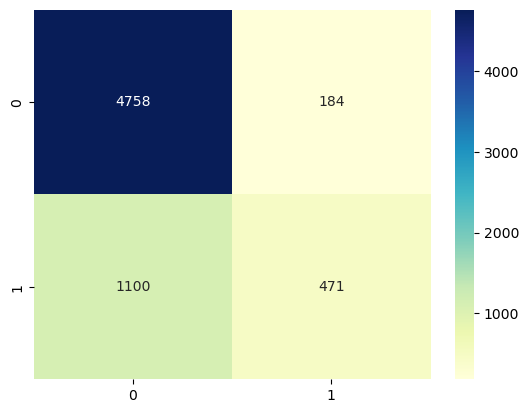

In [116]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

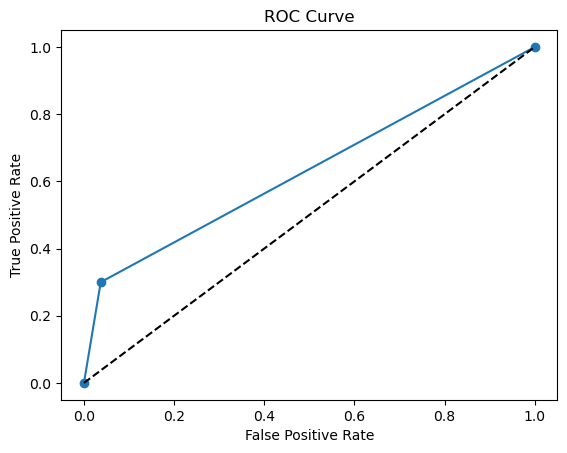

In [117]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with linear kernel and C = 1.0

In [118]:
svc = SVC(kernel = 'linear', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with linear kernel with c = 1.0 is :{accuracy_score(y_test, y_pred)}")

The accuracy of SVM with linear kernel with c = 1.0 is :0.8116075541225242


Training set score: 0.8074324324324325
Test set score: 0.8116075541225242

True Positives(TP) =  4713

True Negatives(TN) =  573

False Positives(FP) =  229

False Negatives(FN) =  998


<AxesSubplot:>

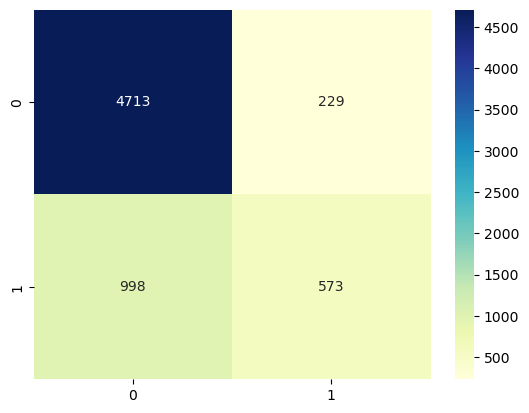

In [119]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

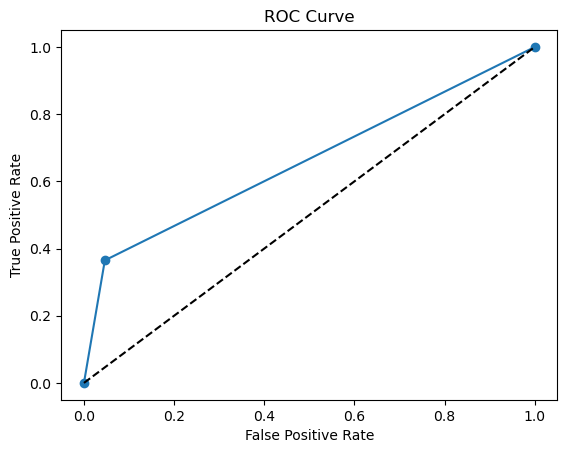

In [120]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with linear kernel and C = 100.0

In [ ]:
svc = SVC(kernel = 'linear', C = 100.0)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with linear kernel with c = 100.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

### Running SVM with linear kernel and C = 1000.0

In [ ]:
svc = SVC(kernel = 'linear', C = 1000.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with linear kernel with c = 100.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with rbf kernel and C = 1.0

In [ ]:
svc = SVC(kernel = 'rbf', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 1.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

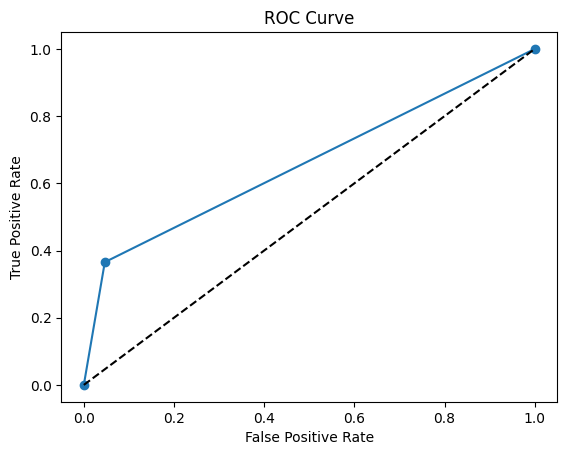

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, th= roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,'o-', label='ROC')
plt.title('ROC Curve')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Running SVM with rbf kernel and C = 100.0

In [ ]:
svc = SVC(kernel = 'rbf', C = 100.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 100.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

### Running SVM with rbf kernel and C = 1000.0



In [ ]:
svc = SVC(kernel = 'linear', C = 1000.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 100.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

### Running SVM with polynomial kernel and C = 1.0

In [ ]:
svc = SVC(kernel = 'poly', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 100.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

### Running SVM with polynomial kernel and C = 100.0

In [ ]:
svc = SVC(kernel = 'poly', C = 100.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 100.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

### Running SVM with polynomial kernel and C = 1000.0

In [ ]:
svc = SVC(kernel = 'poly', C = 1000.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 1000.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

### Running SVM with sigmoid kernel and C = 1.0

In [ ]:
svc = SVC(kernel = 'sigmoid', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 1000.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Test set score: {svc.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

### Running SVM with sigmoid kernel and C = 100.0

In [ ]:
svc = SVC(kernel = 'sigmoid', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 1000.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
svc = SVC(kernel = 'sigmoid', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 1000.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
svc = SVC(kernel = 'sigmoid', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 1000.0 is :{accuracy_score(y_test, y_pred)}")

### Running SVM with sigmoid kernel and C = 1000.0

In [ ]:
svc = SVC(kernel = 'sigmoid', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 1000.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
svc = SVC(kernel = 'sigmoid', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 1000.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
svc = SVC(kernel = 'sigmoid', C = 1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"The accuracy of SVM with rbf kernel with c = 1000.0 is :{accuracy_score(y_test, y_pred)}")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [ ]:
linear_scores

In [ ]:
linear_scores.mean()

rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

rbf_scores.mean()

poly_svc=SVC(kernel='poly')

poly_scores = cross_val_score(poly_svc, X, y, cv=kfold)

poly_scores.mean()

sig_svc=SVC(kernel='sigmoid')

sig_scores=cross_val_score(sig_svc,X,y,cv=kfold)

sig_scores.mean()
